In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dm
from time import time
import pandas as pd
from mcmc.utils import plot_chain, plot_corner

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
plt.style.available

In [2]:
plt.style.use('bmh') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# 1 component

In [ ]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
nu0 = [1]
# sigmaDD = [7]
# hDD = [65]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigmaw = [5.]
a = [1.]

theta = np.array([rhob + sigmaz + rhoDM + nu0 + R + zsun+w0 + sigmaw + a]).flatten()
theta.shape

In [ ]:
z_start = -300
z_end = 300
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


In [ ]:
z = np.linspace(-300, 300, 205)
dz = z[10] - z[0]
fz = dm.fz(z[::10], theta, dz)
fz_smooth = dm.fz(z, theta, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

In [ ]:
w = np.linspace(-30, 30, 300)
dw = w[10] - w[0]
fw = dm.fw(w[::10], theta, dz)
fw_smooth = dm.fw(w, theta, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

## sample

In [ ]:
N = 5000

z = np.random.randn(N)*500
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

# Z[0], W[0] # z changes along the columns, w along the rows

In [ ]:
pot = dm.fzw(pos, theta, dz)
pot.shape

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')

In [ ]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
nu0 = [1]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigmaw = [5.]
a = [1.]
# sigmaw2 = [5.]
# a2 = [1.]

# theta = np.array([rhob + sigmaz + rhoDM + nu0 + R + zsun+w0 + sigmaw + a + sigmaw2 + a2]).flatten()
theta = np.array([rhob + sigmaz + rhoDM + nu0 + R + zsun+w0 + sigmaw + a]).flatten()
theta.shape

In [ ]:
N = 16

z = np.random.randn(N)*500
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

In [ ]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

chain = dm.sample(1000, nwalkers, pos, theta, dz=1., verbose=True)

In [ ]:
plot_chain(chain, labels=[r'$z$', r'$w$'], figsize=(10, 5))

In [ ]:
pos_next = chain[-1]
chain = dm.sample(10000, nwalkers, pos_next, theta, dz=1., verbose=True)

In [ ]:
from mcmc.utils import plot_chain, plot_corner

plot_chain(chain, labels=[r'$z$', r'$w$'], figsize=(10, 5))

In [ ]:
import corner

def plot_corner(chain, labels, burn=0, truths=None, path=None):
    ndim = chain.shape[2]
    flat = chain[burn:].reshape((-1, ndim)).copy()
    print(flat.shape)
    if flat.shape[1] != len(labels):
        raise ValueError("labels must have same length as chain dimension")
    fig = corner.corner(
        flat, 
        labels=labels, 
        quantiles=[0.16, 0.5, 0.84],
        show_titles=True,
        truths=truths,
        title_kwargs={"fontsize": 12},
    )
    if path is not None:
        fig.savefig(path)
    plt.show()

In [ ]:
plot_corner(chain, labels=[r'$z$', r'$w$'])

In [ ]:
Nz = 2000

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()
# randomly sample z
index = np.random.randint(0, len(z), Nz)
z_sample = z[index]
w_sample = w[index]

zbound = 50
mask = (z_sample > -zbound) & (z_sample < zbound)
w_sample = w_sample[mask]

znum, zedge = np.histogram(z_sample, bins=20)
zmid = (zedge[:-1]+zedge[1:])/2
zerr = np.sqrt(znum)
zdata = (zmid, znum, zerr)

wnum, wedge = np.histogram(w_sample, bins=20)
wmid = (wedge[:-1]+wedge[1:])/2
werr = np.sqrt(wnum)
wdata = (wmid, wnum, werr)

# plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].errorbar(*zdata, fmt='.', color='k', capsize=2, lw=1)
axes[0].bar(zmid, znum, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
axes[1].errorbar(*wdata, fmt='.', color='k', capsize=2, lw=1)
axes[1].bar(wmid, wnum, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
axes[0].set_xlabel(r'$z$')
axes[1].set_xlabel(r'$w$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

In [ ]:
df_z = pd.DataFrame({
    'zmid': zmid,
    'znum': znum,
    'zerr': zerr,
})
df_z.to_csv('data/z1.csv', index=False)

df_w = pd.DataFrame({
    'wmid': wmid,
    'wnum': wnum,
    'werr': werr,
})
df_w.to_csv('data/w1.csv', index=False)

# 2 components

In [3]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
nu0 = [1]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigmaw = [5.]
a = [1.]
sigmaw2 = [5.]
a2 = [0.0]

theta = np.array([rhob + sigmaz + rhoDM + nu0 + R + zsun+w0 + sigmaw + a + sigmaw2 + a2]).flatten()
theta.shape

(33,)

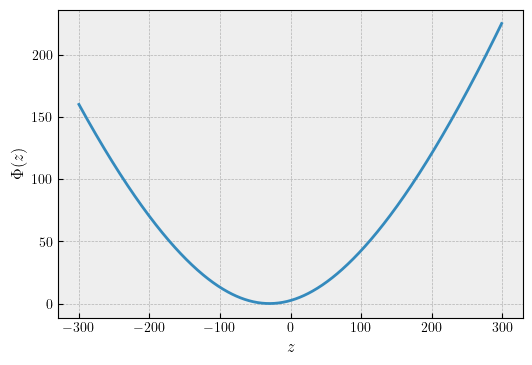

In [4]:
z_start = -300
z_end = 300
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


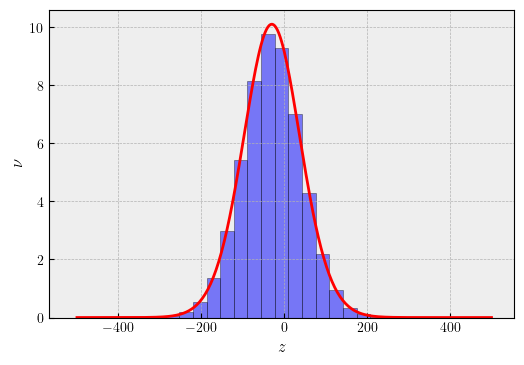

In [5]:
z = np.linspace(-500, 500, 305)
dz = z[10] - z[0]
fz = dm.fz(z[::10], theta, dz)
fz_smooth = dm.fz(z, theta, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

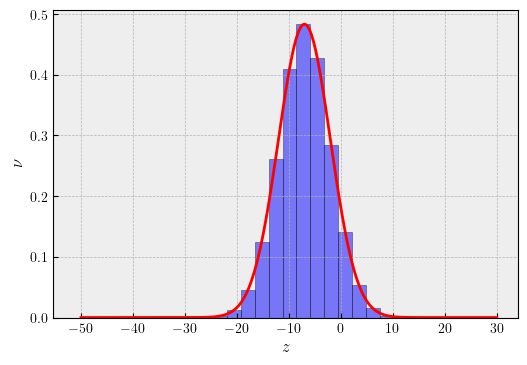

In [6]:
w = np.linspace(-50, 30, 300)
dw = w[10] - w[0]
fw = dm.fw(w[::10], theta, dz)
fw_smooth = dm.fw(w, theta, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

## Sample

In [7]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
nu0 = [1]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigmaw = [5.]
a = [1.]
sigmaw2 = [5.]
a2 = [0.0]

theta = np.array([rhob + sigmaz + rhoDM + nu0 + R + zsun+w0 + sigmaw + a + sigmaw2 + a2]).flatten()
theta.shape

(33,)

In [14]:
N = 1000

# z = np.linspace(-500, 500, 500)
# w = np.zeros(500)
z = np.random.randn(N)*1000
w = np.random.randn(N)*10
dz = 1
pos = np.array([z, w]).T
pos.shape

# Z[0], W[0] # z changes along the columns, w along the rows

(1000, 2)

In [15]:
pot = dm.fzw(pos, theta, dz)
pot.shape

(1000,)

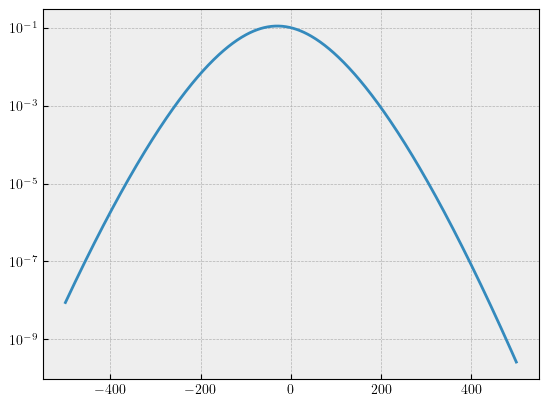

In [11]:
plt.plot(z, pot)
plt.yscale('log')

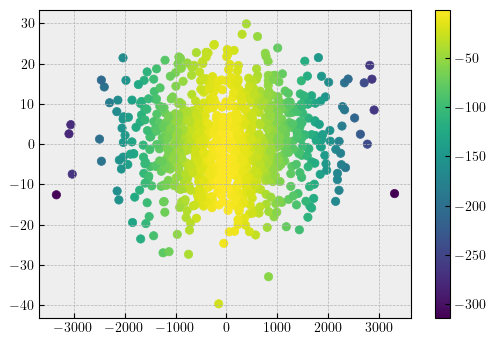

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

In [17]:
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [20]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = dm.sample(500, nwalkers, pos, theta, dz=1., verbose=True)
print(time() - t0, "s")

2.193402051925659 s
Acceptance rate: 0.722625


  0%|▎         | 0/500 [00:00<inf, ?it/s]

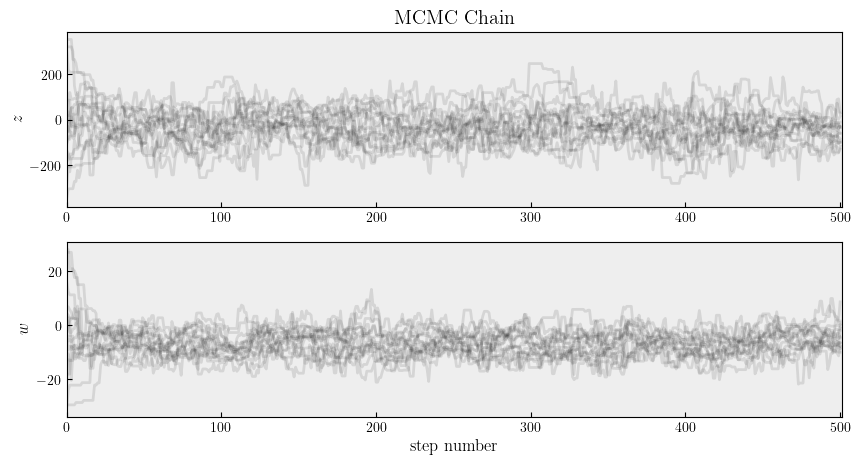

In [21]:
plot_chain(chain, labels=[r'$z$', r'$w$'], figsize=(10, 5))

In [25]:
pos_next = chain[-1]
chain = dm.sample(10000, nwalkers, pos_next, theta, dz=1., verbose=True)

Acceptance rate: 0.72465


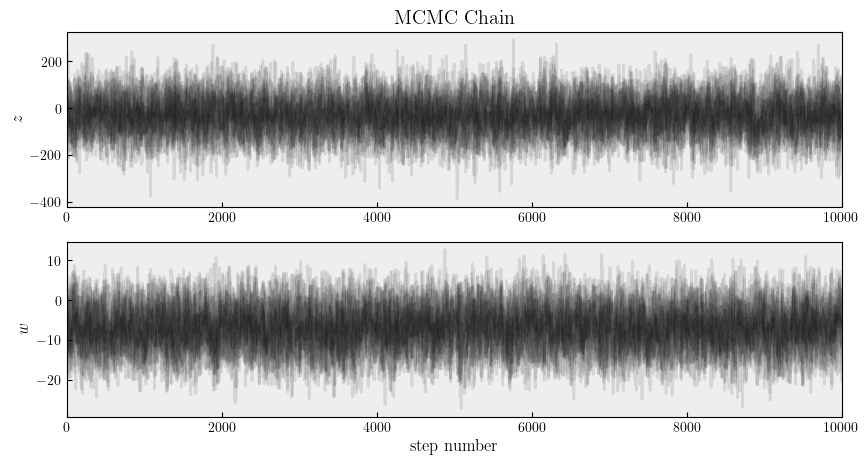

In [26]:
plot_chain(chain, labels=[r'$z$', r'$w$'], figsize=(10, 5))

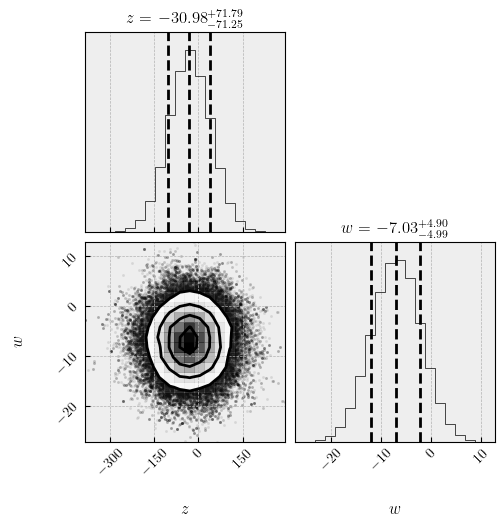

In [27]:
plot_corner(chain, labels=[r'$z$', r'$w$'])

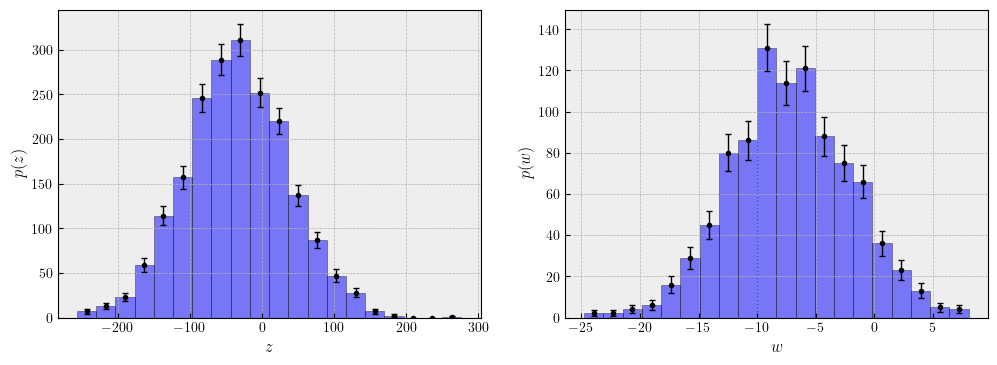

In [28]:
Nz = 2000

z = chain[:, :, 0].flatten()
w = chain[:, :, 1].flatten()
# randomly sample z
index = np.random.randint(0, len(z), Nz)
z_sample = z[index]
w_sample = w[index]

zbound = 50
mask = (z_sample > -zbound) & (z_sample < zbound)
w_sample = w_sample[mask]

znum, zedge = np.histogram(z_sample, bins=20)
zmid = (zedge[:-1]+zedge[1:])/2
zerr = np.sqrt(znum)
zdata = (zmid, znum, zerr)

wnum, wedge = np.histogram(w_sample, bins=20)
wmid = (wedge[:-1]+wedge[1:])/2
werr = np.sqrt(wnum)
wdata = (wmid, wnum, werr)

# plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].errorbar(*zdata, fmt='.', color='k', capsize=2, lw=1)
axes[0].bar(zmid, znum, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
axes[1].errorbar(*wdata, fmt='.', color='k', capsize=2, lw=1)
axes[1].bar(wmid, wnum, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
axes[0].set_xlabel(r'$z$')
axes[1].set_xlabel(r'$w$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

In [ ]:
df_z = pd.DataFrame({
    'zmid': zmid,
    'znum': znum,
    'zerr': zerr,
})
df_z.to_csv('data/z2.csv', index=False)

df_w = pd.DataFrame({
    'wmid': wmid,
    'wnum': wnum,
    'werr': werr,
})
df_w.to_csv('data/w2.csv', index=False)